In [2]:
from utils import *
setup_chapter()

Using transformers v4.41.2
Using datasets v2.21.0


In [2]:
from datasets import list_datasets

In [4]:
all_datasets = list_datasets()

C:\Users\srini\AppData\Local\Temp\ipykernel_27248\374882858.py:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


In [5]:
print(f'No.of datasets available in huggling face {len(all_datasets)}')

No.of datasets available in huggling face 203736


In [6]:
print(f'here are top 10 datasets - {all_datasets[:10]}')

here are top 10 datasets - ['amirveyseh/acronym_identification',
'ade-benchmark-corpus/ade_corpus_v2', 'UCLNLP/adversarial_qa',
'Yale-LILY/aeslc', 'nwu-ctext/afrikaans_ner_corpus', 'fancyzhx/ag_news',
'allenai/ai2_arc', 'google/air_dialogue', 'komari6/ajgt_twitter_ar',
'legacy-datasets/allegro_reviews']


In [3]:
from datasets import load_dataset

In [4]:
[ds for ds in all_datasets if ds == 'dair-ai/emotion']

NameError: name 'all_datasets' is not defined

In [5]:
from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion")

In [6]:
dataset


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
dataset['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [8]:
dataset['train'][0:10]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was',
  'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
  'i feel as confused about life as a teenager or as jaded as a year old man',
  'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
  'i feel romantic too'],
 'label': [0, 0, 3, 2, 3, 0, 5, 4, 1, 2]}

In [9]:
import pandas as pd

In [10]:
dataset.set_format('pandas')

In [11]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [12]:
df = dataset["train"][:]

In [13]:
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [14]:
df['label_name']= df['label'].apply(dataset["train"].features['label'].int2str)

In [15]:
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


In [16]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

<Axes: xlabel='label_name', ylabel='count'>

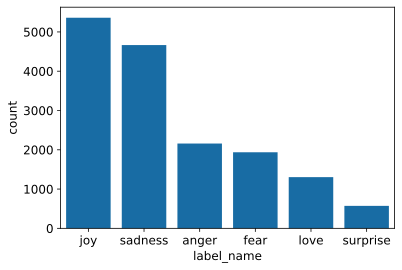

In [18]:
sns.barplot(df['label_name'].value_counts())

In [19]:
df['words_per_tweet'] = df['text'].apply(len)

<Axes: xlabel='label_name', ylabel='words_per_tweet'>

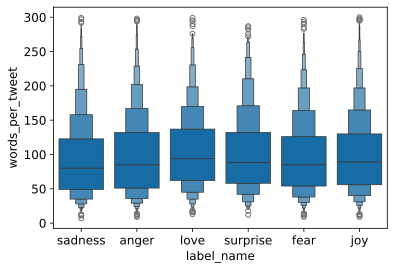

In [20]:
sns.boxenplot(df,x='label_name',y='words_per_tweet')

In [21]:
from transformers import AutoTokenizer

In [22]:
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [23]:
tokens = tokenizer.tokenize("Hi! THis is Srinivas. I am testing the auto tokenizer class from huggingface transformer library")

In [24]:
tokens

['hi',
 '!',
 'this',
 'is',
 'sri',
 '##ni',
 '##vas',
 '.',
 'i',
 'am',
 'testing',
 'the',
 'auto',
 'token',
 '##izer',
 'class',
 'from',
 'hugging',
 '##face',
 'transform',
 '##er',
 'library']

In [25]:
tokenizer.vocab_size

30522

In [26]:
tokenizer.max_len_single_sentence

510

In [29]:
tokens = tokenizer("Hi! THis is Srinivas. I am testing the auto tokenizer class from huggingface transformer library")

In [30]:
tokens

{'input_ids': [101, 7632, 999, 2023, 2003, 5185, 3490, 12044, 1012, 1045, 2572, 5604, 1996, 8285, 19204, 17629, 2465, 2013, 17662, 12172, 10938, 2121, 3075, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [5]:
from datasets import load_dataset

In [6]:
dataset = load_dataset('dair-ai/emotion')

In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [34]:
dataset.reset_format()
tokenizer(dataset['train']['text'][:2],padding=True,truncation=True)

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [11]:
from transformers import AutoModel

In [12]:
import torch

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [14]:
device

device(type='cuda')

In [15]:
model = AutoModel.from_pretrained('distilbert-base-uncased').to(device)

In [16]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [17]:
text = 'This is a test'

In [18]:
inputs = tokenizer(text,return_tensors='pt')

In [23]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [19]:
inputs.items()

dict_items([('input_ids', tensor([[ 101, 2023, 2003, 1037, 3231,  102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1]]))])

In [20]:
inputs = { k:v.to(device) for k,v in inputs.items()}

In [21]:
with torch.no_grad():
    outputs = model(**inputs)

In [22]:
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [23]:
last_hidden_state = outputs.last_hidden_state

In [24]:
last_hidden_state[:,0,:].shape

torch.Size([1, 768])

In [25]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [26]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return {'hidden_state':last_hidden_state[:,0].cpu().numpy()}


In [92]:
def tokenize(batch):
    return tokenizer(batch["text"],padding=True,truncation= True)
emotions_encoded = dataset.map(tokenize,batched=True,batch_size=None)

In [28]:
emotions_encoded['test']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 2000
})

In [29]:
emotions_encoded.set_format('torch',columns=['input_ids','attention_mask','label'])

In [30]:
hidden_states = emotions_encoded.map(extract_hidden_states,batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [31]:
hidden_states['train'][0].keys()

dict_keys(['label', 'input_ids', 'attention_mask', 'hidden_state'])

In [32]:
hidden_states

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [33]:
import numpy as np

In [34]:
X_train = np.array(hidden_states['train']['hidden_state'])

In [35]:
Y_train = np.array(hidden_states['train']['label'])

In [36]:
Y_train

array([0, 0, 3, ..., 1, 3, 0], dtype=int64)

In [37]:
X_val = np.array(hidden_states['validation']['hidden_state'])

In [38]:
Y_val = np.array(hidden_states['validation']['label'])

In [39]:
X_train.shape,X_val.shape

((16000, 768), (2000, 768))

In [40]:
from umap import UMAP

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
X_train_scaled = MinMaxScaler().fit_transform(X_train)

In [43]:
mapper = UMAP(n_components=2,metric='cosine').fit(X_train_scaled)

In [46]:
mapper.embedding_

array([[ 4.0464773,  6.216323 ],
       [-3.4355216,  5.1446815],
       [ 5.0488563,  2.7818153],
       ...,
       [-2.8411   ,  2.5081377],
       [ 4.881586 ,  3.1286988],
       [-2.3678503,  5.061216 ]], dtype=float32)

In [47]:
import pandas as pd

In [48]:
df = pd.DataFrame(mapper.embedding_,columns=['X','Y'])

In [49]:
df

,X,Y
0,4.046477,6.216323
1,-3.435522,5.144681
2,5.048856,2.781815
3,-2.687103,3.075830
4,-3.524402,3.116787
...,...,...
15995,-0.947184,6.261541
15996,-2.525993,4.895216
15997,-2.841100,2.508138
15998,4.881586,3.128699


In [50]:
df['label'] = Y_train

In [51]:
df

,X,Y,label
0,4.046477,6.216323,0
1,-3.435522,5.144681,0
2,5.048856,2.781815,3
3,-2.687103,3.075830,2
4,-3.524402,3.116787,3
...,...,...,...
15995,-0.947184,6.261541,0
15996,-2.525993,4.895216,0
15997,-2.841100,2.508138,1
15998,4.881586,3.128699,3


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\srini\AppData\Local\Temp\ipykernel_35272\2364457481.py:7: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_emb_sub = df.query(f"label == {i}")
C:\Users\srini\AppData\Local\Temp\ipykernel_35272\2364457481.py:7: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_emb_sub = df.query(f"label == {i}")
C:\Users\srini\AppData\Local\Temp\ipykernel_35272\2364457481.py:7: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_emb_sub = df.query(f"label == {i}")
C:\Users\srini\AppData\Local\Temp\ipykernel_35272\2364457481.py:7: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_emb_sub = df

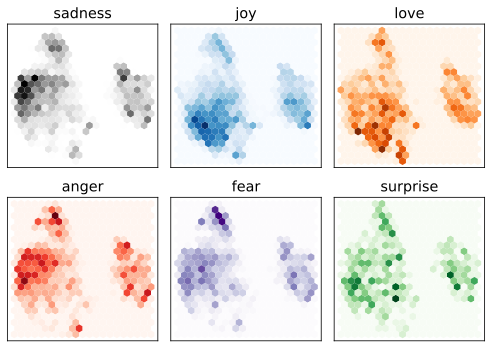

In [93]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions_encoded["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

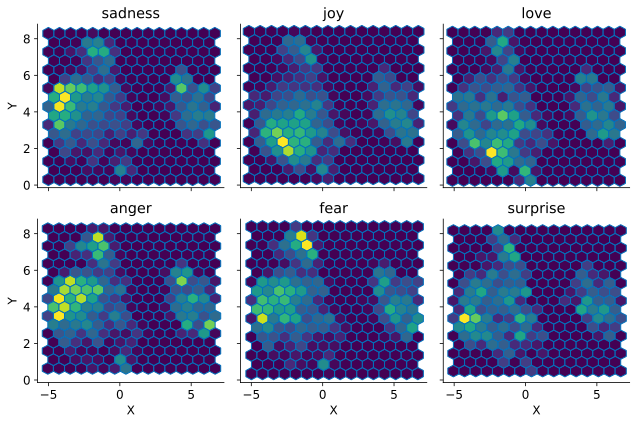

In [98]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(df, col="label", col_wrap=3,)

g.map(plt.hexbin, "X", "Y",gridsize=15)

for ax,title in zip(g.axes, emotions_encoded["train"].features["label"].names):
    ax.set_title(title)



In [99]:
from sklearn.linear_model import LogisticRegression

l_model = LogisticRegression()
l_model.fit(X_train,Y_train)

C:\Users\srini\anaconda3\envs\test\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
l_model.score(X_val,Y_val)

0.6085

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [103]:
predictions = l_model.predict(X_val)

In [119]:
confusion_matrix = confusion_matrix(Y_val,predictions,normalize='true')

In [120]:
confusion_matrix.shape

(6, 6)

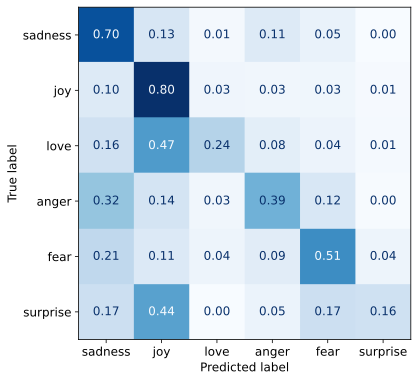

In [121]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=emotions_encoded['train'].features['label'].names)
fig,ax = plt.subplots(figsize=(6,6))
disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
plt.show()

{'text': 'im updating my blog because i feel shitty',
 'label': 0,
 'input_ids': [101,
  10047,
  2039,
  16616,
  2026,
  9927,
  2138,
  1045,
  2514,
  28543,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}